In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
data = pd.read_csv('data.csv', index_col = 0)
data.head()

,Humidity,Tempreture
Time,,
0,44.0,21.8
1,44.0,21.8
2,44.0,21.8
3,42.0,22.6
4,42.0,22.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119266 entries, 0 to 119265
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Humidity    119266 non-null  float64
 1   Tempreture  119266 non-null  float64
dtypes: float64(2)
memory usage: 2.7 MB


In [5]:
data.shape

(119266, 2)

In [6]:
data.isnull().sum()

Humidity      0
Tempreture    0
dtype: int64

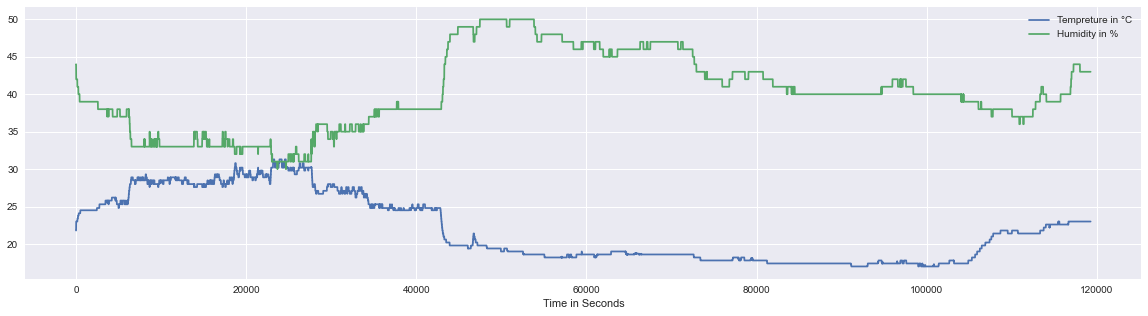

In [7]:
plt.figure(figsize=(20,5))
plt.plot(data['Tempreture'], label = "Tempreture in °C")
plt.plot(data['Humidity'], label = "Humidity in %")
plt.xlabel('Time in Seconds')
plt.legend()

In [20]:
ts = data['Tempreture']

In [9]:
from statsmodels.tsa.stattools import adfuller

def check_adfuller(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

def check_mean_std(ts):
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(22,10)) 
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

Test statistic:  -0.9930317901062558
p-value:  0.7557973033590333
Critical Values: {'1%': -3.4304048629218467, '5%': -2.8615642485949544, '10%': -2.5667829066710817}


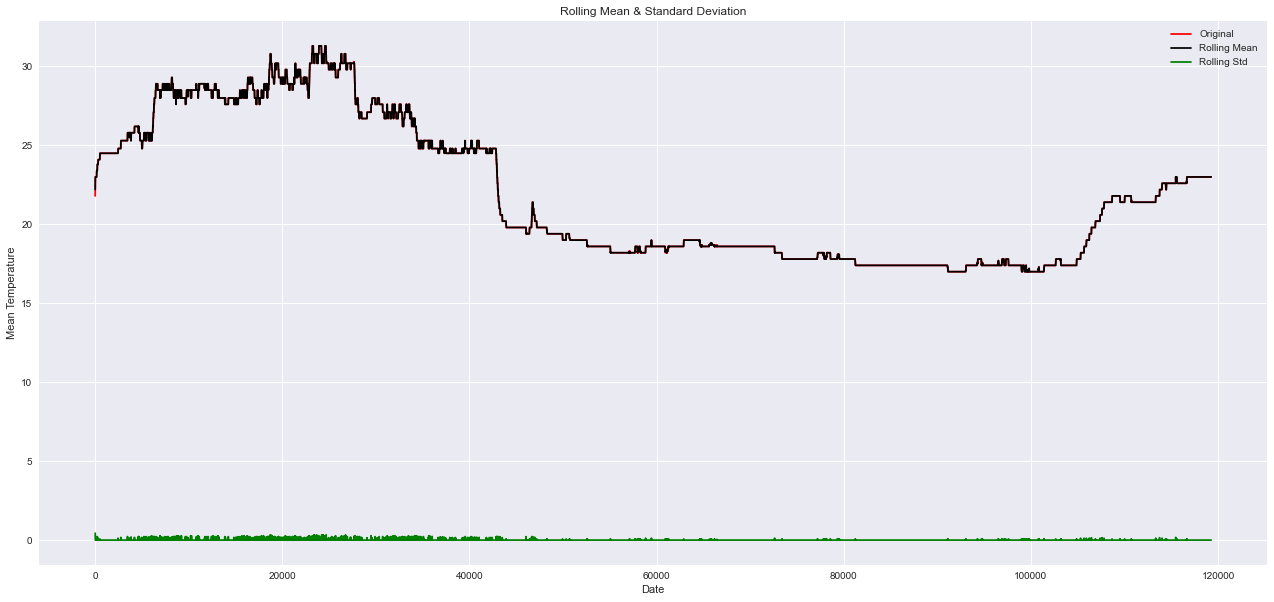

In [10]:
check_adfuller(data['Tempreture'])
check_mean_std(ts)

Test statistic:  -1.2841959172148012
p-value:  0.6363713292856525
Critical Values: {'1%': -3.4304048629218467, '5%': -2.8615642485949544, '10%': -2.5667829066710817}


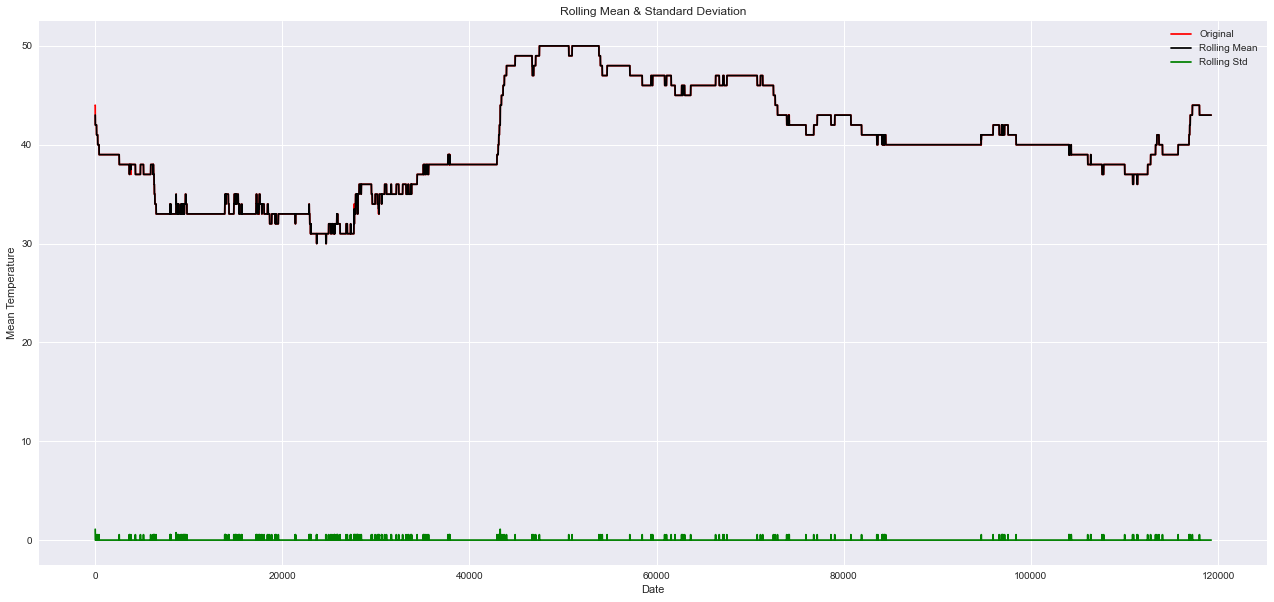

In [11]:
check_adfuller(data['Humidity'])
check_mean_std(data['Humidity'])

In [38]:
# ARIMA LİBRARY
import statsmodels.api as sm
# from pandas import datetime

# fit model
model = sm.tsa.ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()

# predict
# start_index = datetime(1944, 6, 25)
# end_index = datetime(1945, 5, 31)
forecast = model_fit.predict(start=0, end=120000)


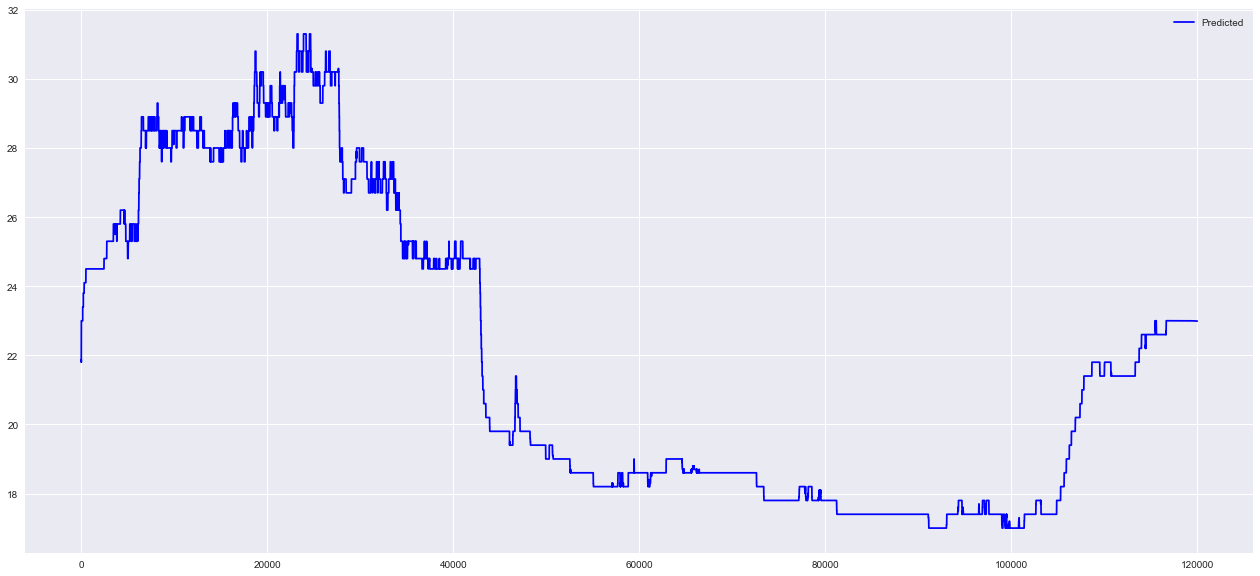

In [13]:
# visualization
plt.figure(figsize=(22,10))
# plt.plot(ts,label = "original", color = 'red')
plt.plot(forecast, label = "Predicted", color = 'blue')
plt.legend()

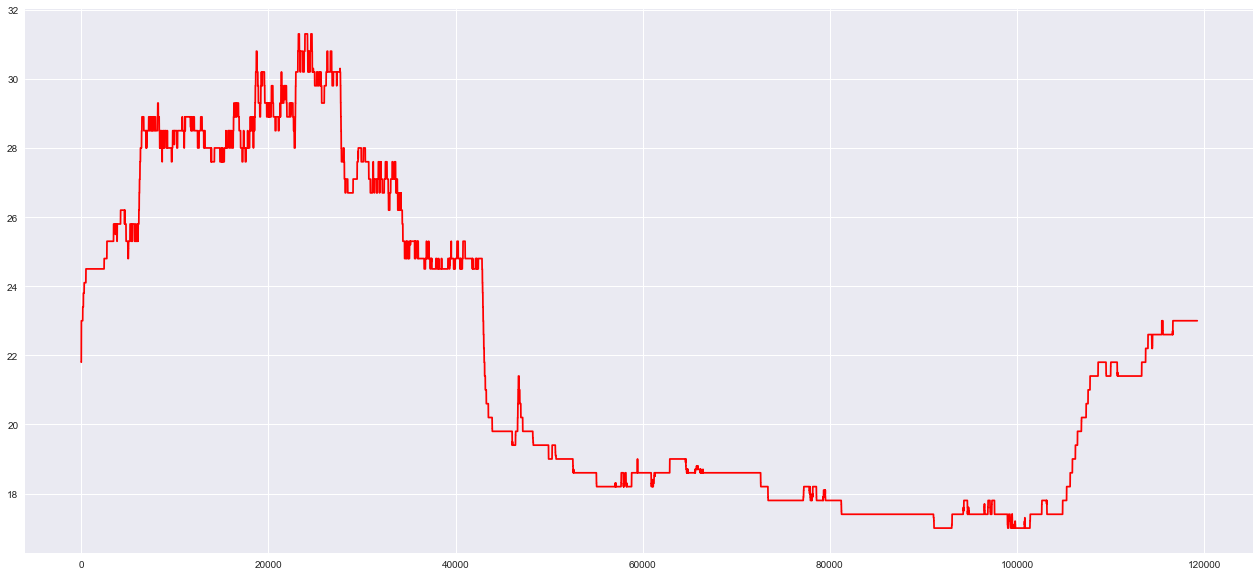

In [14]:
plt.figure(figsize=(22,10))
plt.plot(ts,label = "original", color = 'red')

In [15]:
model_fit.predict(start=20071, end=20072)

Time
20071    28.899916
20072    28.899916
Name: predicted_mean, dtype: float64